<a href="https://colab.research.google.com/github/JosegSuarezb/Integracion-de-los-datos/blob/main/Reto1_Jose_Gregorio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Caracterización y Muestreo de Variables Aleatorias**

Una empresa del sector asegurador a creado una base de datos de eventos de pérdidas asociado con la administración y la ejecución asociado con los procesos de la organización. De acuerdo con la base de datos, la empresa quiere llevar a cabo la caracterización de la distribución agregada de sus pérdidas. Para la caracterización de la distribución agregada de pérdidas es necesario tener en cuenta las siguientes métricas:
•	Error asociado con la muestra de los datos. (Tamaño de la Muestra).
•	Media
•	Varianza
•	Coeficiente de Asimetría
•	Coeficiente de Kurtosis
•	Llevar a cabo el proceso de muestreo aleatorio de la variable a una confiabilidad del 99.9% según los acuerdos de Basilea mediante la utilización del método de Montecarlo


In [1]:
#cargar las librerias
import numpy as np #funciones numericas
import pandas as pd #comunicacion con el excel
import matplotlib.pyplot as plt
import seaborn as sns #Libreria para la grafica de distribuciones

#para carga automatica de los datos
from google.colab import drive  #cargar datos desde el drive
drive.mount('/content/drive')

Mounted at /content/drive


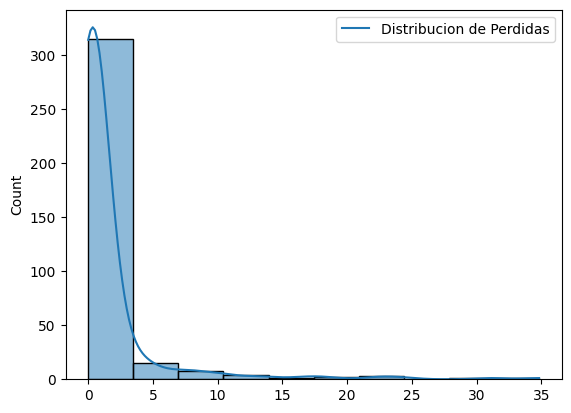

In [2]:
nxl='/content/drive/MyDrive/Integracion de datos (enfasis)/1. AdmonEjecProcesos.xlsx'
XDB=pd.read_excel(nxl,sheet_name=0)
XDB.head(100) #mostrar los primero 100 datos

#Tomamos las variables de interes
Xev=XDB.iloc[:,3] #Variable eventos semanales
Xsev=XDB.iloc[:,4] #perdidas promedio por evento
LDA=np.multiply(Xev,Xsev)

#graficamos la distribucion de las perdidas
plt.figure()
sns.histplot(LDA, kde=True, bins=10)
#bins agrupar los datos en 10 intervalos
plt.legend(['Distribucion de Perdidas'])
plt.show()

In [11]:
counts,bin_edges=np.histogram(LDA,bins=10)
print('Los datos por intervalo son:\n',counts) #cuantos datos hay por intervalo
print('Los limites de los intervalos son:\n',bin_edges) #limites de los intervalos

#Los valores centrales - marcas de clase
mc=(bin_edges[:-1]+bin_edges[1:])/2
#limites inferiore bin_edges[:-1]
#limites superiores bin_edges[1:]
print('Los valores centrales de las clases son:\n',mc)

#cuantos datos hay por intervalo %
fp=counts/sum(counts)
print('Los datos por intervalo son:\n', fp)

#2. se procede con el calculo de las medidas de tendencia central
#Media, Varianza, coeficiente de asimetria, kurtosis
u=np.sum(np.multiply(mc,fp))
print('la media de los datos es:\n',u)

#3. Desviacion - Estandar (Varianza)
var=np.sum(np.multiply((mc-u)**2,fp)) #suma producto del excel
std=np.sqrt(var)
print('La desviacion estandar de los datos es:\n', std)

#1. error del muestreo
error_muestreo = std / np.sqrt(len(LDA))  # std es la desviación estándar, LDA son los datos
print("Error de muestreo:", error_muestreo)

#4. Coeficiente de asimetria
cas=np.sum(np.multiply(((mc-u)/std)**3,fp))
print('El coeficiente de asimetria de los datos es:\n', cas)

#5. coeficiente de kurtosis
ck=np.sum(np.multiply(((mc-u)/std)**4,fp))
ck=ck-3
print('El coeficiente de kurtosis de los datos es:', ck)

Los datos por intervalo son:
 [315  15   8   4   1   2   3   0   1   1]
Los limites de los intervalos son:
 [ 0.          3.48221562  6.96443124 10.44664686 13.92886248 17.4110781
 20.89329372 24.37550933 27.85772495 31.33994057 34.82215619]
Los valores centrales de las clases son:
 [ 1.74110781  5.22332343  8.70553905 12.18775467 15.66997029 19.15218591
 22.63440152 26.11661714 29.59883276 33.08104838]
Los datos por intervalo son:
 [0.9        0.04285714 0.02285714 0.01142857 0.00285714 0.00571429
 0.00857143 0.         0.00285714 0.00285714]
la media de los datos es:
 2.656433058055811
La desviacion estandar de los datos es:
 3.6179492178130417
Error de muestreo: 0.19338752022575958
El coeficiente de asimetria de los datos es:
 5.313307467317224
El coeficiente de kurtosis de los datos es: 31.735556826670006


In [12]:
from scipy.stats import skew,kurtosis

LDAdf=pd.DataFrame(LDA)
LDAm=LDAdf.sample(n=1000,replace=True)


print('El coeficiente de asimetria de los datos es:\n', skew(LDAm))
print('El coeficiente de kurtosis de los datos es:', kurtosis(LDAm))

print("la variacion del coeficiente de asimetria es:",(cas-skew(LDAm))/cas)
print("La variacion del coeficiente de curtosis es:",(ck-kurtosis(LDAm))/ck)


El coeficiente de asimetria de los datos es:
 [4.65565254]
El coeficiente de kurtosis de los datos es: [24.80813797]
la variacion del coeficiente de asimetria es: [0.12377506]
La variacion del coeficiente de curtosis es: [0.21828572]


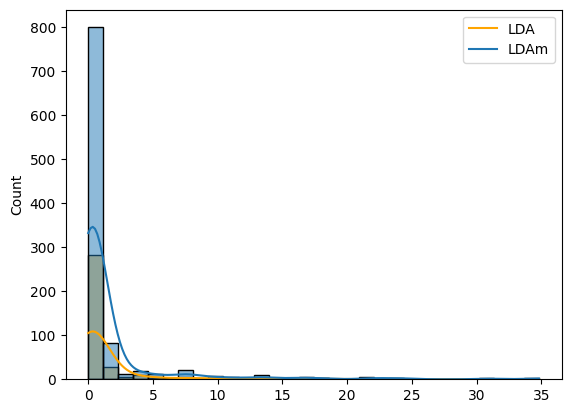

In [13]:
#se procede con la grafica de distribuciones
plt.figure()
sns.histplot(LDA, kde=True, bins=30, color="orange",alpha=0.5, label='LDA')
sns.histplot(LDAm, kde=True, bins=30, color="blue",alpha=0.5, label='LDAm')
plt.legend(['LDA','LDAm'])
plt.show()

**Analisis de resultados**

En la base de datos se cuenta con un total de 350 registros de eventos de pérdida asociados con la administración y ejecución de procesos dentro de la organización aseguradora. De acuerdo con la grafica de distribucion de frecuencias podemos observar que esta posee una estructura de cola larga lo que indica que la mayoria de las perdidas no son de gran cantidad con un coeficiente de asimetria del 5.31 y con un coeficiente de kurtosis de 32 unidades, lo que indica que los datos estan concentrados alrededor de la media como se muestra tanto en el colab como en el excel, en un 90% aproximadamente. De acuerdo con el excel, el 95% de los datos se encuentran concentrados en el Li(-3.90) y Ls(9.04) lo que muestra que la mayor perdida que se tuvo con esas transacionnes fallidas fue hasta 9 millones.
El error de muestreo que se encontro fue de un 0.19  lo que indica que la muestra es representativa y los resultados obtenidos tienen un margen de error bajo.
Ahora bien, luego de aplicar el metodo Montecarlo para conseguir un muestreo aleatorio del LDA de mil para tener una confiabilidad del 99,9% segun los acuerdos de basilea se obtuvo que este tuvo un coeficiente de asimetria de 4.6 con una variacion comparado al muestreo original del 0.12 lo que indica que no se tuvo un cambio muy significativo al igual que el de kurtosis que dio 25 unidades con una variacion de 0.21 lo que indica que hubo cierta variacion pero se puede considerar que con el metodo Montecarlo tambien se llegaria al mismo resultado comparado con el muestreo original. Además como se observa en la grafica el LDA y el LDAm (Montecarlo) presentaron una dsitribucion de frecuancia con estrutura de cola larga indicando que la mayoria de perdidas se encuentra alrededor de la media y que las perdidas mayores no son frecuentes siguiendo el mismo patron del muestreo original.